### Chargement du dataset

In [1]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")

# Localiser le fichier CSV dans le dossier téléchargé
csv_train = f"{path}/train.csv"
csv_test = f"{path}/test.csv"

# Charger le fichier CSV dans un DataFrame
df_train = pd.read_csv(csv_train, encoding='ISO-8859-1')
df_test = pd.read_csv(csv_test, encoding='ISO-8859-1')

# Afficher les premières lignes
display(df_train.head())
display(df_test.head())

d:\Sources\DS-Machine-Learning\Text-mining\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [2]:
# Ne récupérer que text et sentiment
df_train = df_train[["text", "sentiment"]]
df_test = df_test[["text", "sentiment"]]

print ("Valeurs manquantes :")
display(df_train.isna().sum())
display(df_test.isna().sum())

display(df_train.loc[df_train['text'].isna()])
display(df_test.loc[df_test['text'].isna()])

df_train = df_train.dropna()
df_test = df_test.dropna()

print ("Doublons :")
display(df_train.duplicated().sum())
display(df_test.duplicated().sum())

print("Train :",df_train.shape)
display(df_train)

print("Test :",df_test.shape)
display(df_test)



Valeurs manquantes :


text         1
sentiment    0
dtype: int64

text         1281
sentiment    1281
dtype: int64

,text,sentiment
314,NaN,neutral


,text,sentiment
3534,NaN,NaN
3535,NaN,NaN
3536,NaN,NaN
3537,NaN,NaN
3538,NaN,NaN
...,...,...
4810,NaN,NaN
4811,NaN,NaN
4812,NaN,NaN
4813,NaN,NaN


Doublons :


np.int64(0)

np.int64(0)

Train : (27480, 2)


,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


Test : (3534, 2)


,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,All alone in this old house again. Thanks for...,positive
3531,I know what you mean. My little dog is sinkin...,negative
3532,_sutra what is your next youtube video gonna b...,positive


### Préparation des données

In [6]:
# Mise en minuscule 
df_train["text"] = df_train["text"].str.lower()
df_test["text"] = df_test["text"].str.lower()

# Récupération et augmentation des stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
new_stop_words = [",", ".", "`","``", "@", "*", "(", ")", "...", "!", "?", "-", "_", ">", "<", ":", "/", "=", "--", "©", "~", ";", "\\", "\\\\",""]
stop_words.update(new_stop_words)

# Fusion des commentaires, au global et par catégorie
txt_all_train = ""
for comment in df_train["text"]:
    txt_all_train += comment + " "
txt_pos_train = ""
for comment in df_train.loc[df_train["sentiment"]=="positive","text"]:
    txt_pos_train += comment + " "
txt_neg_train = ""
for comment in df_train.loc[df_train["sentiment"]=="negative","text"]:
    txt_neg_train += comment + " "
txt_neu_train = ""
for comment in df_train.loc[df_train["sentiment"]=="neutral","text"]:
    txt_neu_train += comment + " "

print (txt_all_train)

 i`d have responded, if i were going  sooo sad i will miss you here in san diego!!! my boss is bullying me...  what interview! leave me alone  sons of ****, why couldn`t they put them on the releases we already bought http://www.dothebouncy.com/smf - some shameless plugging for the best rangers forum on earth 2am feedings for the baby are fun when he is all smiles and coos soooo high  both of you  journey!? wow... u just became cooler.  hehe... (is that possible!?)  as much as i love to be hopeful, i reckon the chances are minimal =p i`m never gonna get my cake and stuff i really really like the song love story by taylor swift my sharpie is running dangerously low on ink i want to go to music tonight but i lost my voice. test test from the lg env2 uh oh, i am sunburned  s`ok, trying to plot alternatives as we speak *sigh* i`ve been sick for the past few days  and thus, my hair looks wierd.  if i didnt have a hat on it would look... http://tinyurl.com/mnf4kw is back home now      gonna 

### Nuages de mots

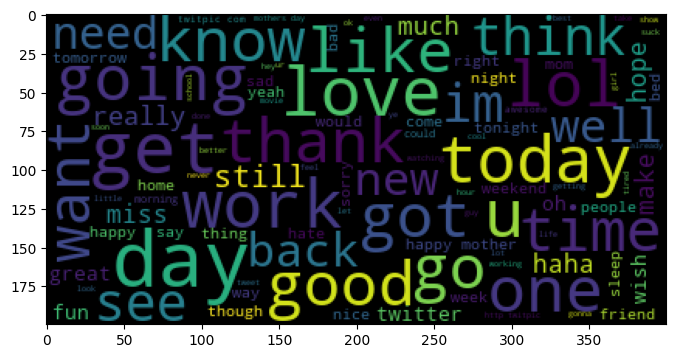

In [ ]:
# Nuage de mots pour tout le corpus
from wordcloud import WordCloud
wc = WordCloud(background_color="black",max_words=100,stopwords=stop_words,max_font_size=50)

import matplotlib.pyplot as plt 
plt.figure(figsize= (8,6)) # Initialisation d'une figure
wc.generate(txt_all_train) # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

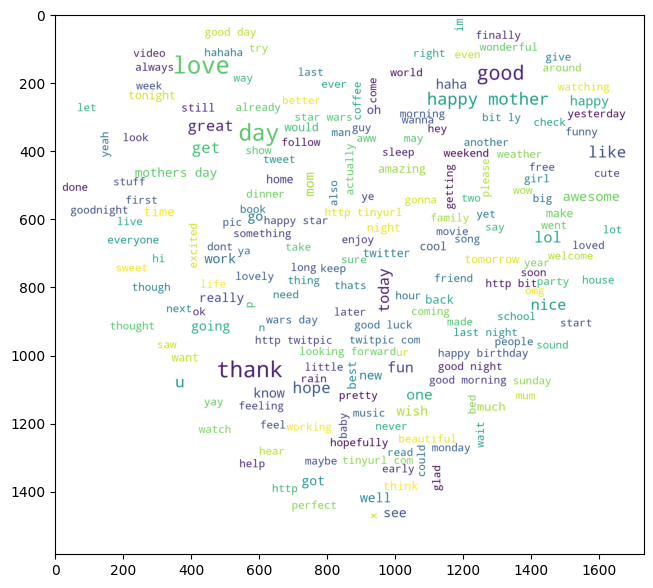

In [11]:
from PIL import Image
import numpy as np

def plot_word_cloud(text, masque, background_color = "black"):
    # Définir un masque
    mask_coloring = np.array(Image.open(str(masque)))
    # Définir le calque du nuage des mots
    wc = WordCloud(width=800, height=400, background_color=background_color, 
                   max_words=200, stopwords=stop_words, mask = mask_coloring, 
                   max_font_size=70, random_state=42)
    # Générer et afficher le nuage de mots
    plt.figure(figsize= (15,7))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()

plot_word_cloud(txt_pos_train, "coeur.jpg",background_color="white")

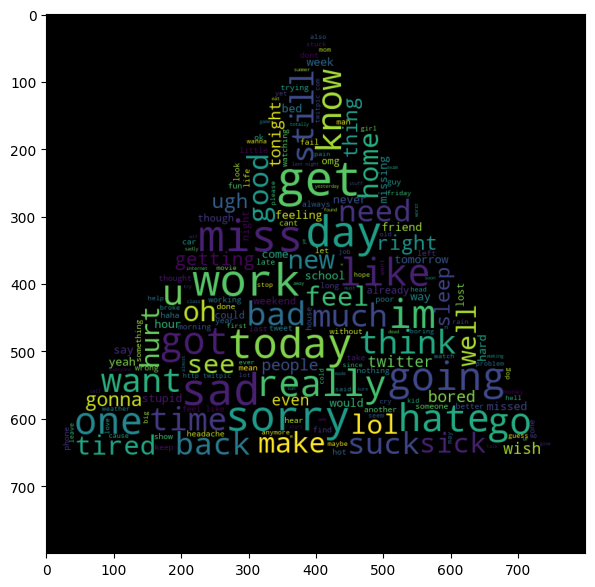

In [13]:
plot_word_cloud(txt_neg_train, "mal.png")